<a href="https://colab.research.google.com/github/good-thinking/easy-coding2/blob/main/%EA%B5%AC%EA%B0%95%EC%A1%B02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 소년범죄자 수의 감소와 지능형 범죄자 수 증가

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [51]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
from pandas.errors import InvalidIndexError

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

from sklearn.neighbors import KNeighborsRegressor

In [3]:
def read_file(file_address) :
  print("-------------- file read ---------------")
  df = pd.read_csv(file_address, encoding = "cp949")
  df = pd.DataFrame(df)
  return df

In [4]:
def normalization(df, column_number):
  print("-------------- normalization ---------------")
  df[df.columns[column_number]] = np.log1p(df[df.columns[column_number]])
  sns.distplot(df[df.columns[column_number]])
  return df

In [5]:
def data_IQR(df,column_number) :
  print("-------------- Data_IQR ---------------")
  q1 = df[df.columns[column_number]].quantile(q=0.25)
  q3 = df[df.columns[column_number]].quantile(q=0.75)
  IQR = q3-q1
  data_IQR2 = df[(df[df.columns[column_number]] < q3 + IQR * 1.5) & 
                 (df[df.columns[column_number]] > q1 - IQR * 1.5)]
  sns.distplot(df[df.columns[column_number]])
  return data_IQR2

In [6]:
from typing_extensions import dataclass_transform
def before_making_model(df, x_list, column_number):
  num = x_list
  X = df[num]
  Y = df[df.columns[column_number]]
  X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
  ct = ColumnTransformer([('scling', StandardScaler(), num)])
  ct.fit(X_train)
  X_train = ct.transform(X_train)
  X_test = ct.transform(X_test)
  return [X_train, X_test, Y_train, Y_test]

In [7]:
def print_columns(df):
  column = pd.DataFrame(df.columns)
  print(column)


In [8]:
def linearRegress(train_test_data,columns):
  print("----------LinearRegression value-----------")
  X_train, X_test, Y_train, Y_test = train_test_data
  #X_train = train_test_data[0]
  #X_test = train_test_data[1]
  #Y_train = train_test_data[2]
  #Y_test = train_test_data[3]

  lr = LinearRegression().fit(X_train, Y_train) 
  Y_pred = lr.predict(X_test)
  print("predict value\n",Y_pred)
  print("train R2 : {:.3f}".format(lr.score(X_train, Y_train)))
  print("test R2 : {:.3f}".format(lr.score(X_test, Y_test))) 
  rmse = sqrt(mean_squared_error(Y_test, Y_pred)) 
  print("RMSE : {:.3f}". format(rmse)) 
  print("--------------------------")
  print(columns)
  print("절편", np.round(lr.intercept_, 3))
  print("가중치(beta)", np.round(lr.coef_, 3))
  return [Y_pred, Y_test]

In [9]:
def Ridge_function(train_test_data):
  X_train, X_test, Y_train, Y_test = train_test_data
  lr_ridge = Ridge(random_state = 0).fit(X_train, Y_train)
  Y_pred = lr_ridge.predict(X_test)
  rmse = sqrt(mean_squared_error(Y_test, Y_pred))
  print("ridge R2 : {:.3f}".format(lr_ridge.score(X_train, Y_train)))
  print("RMSE : {:.3f}".format(rmse))
  return [Y_pred, Y_test]


In [10]:
def Lasso_function(train_test_data):
  X_train, X_test, Y_train, Y_test = train_test_data
  lr_lasso = Lasso(random_state = 0, alpha = 0.01, max_iter = 1000).fit(X_train, Y_train)
  Y_pred = lr_lasso.predict(X_test)

  rmse = sqrt(mean_squared_error(Y_test, Y_pred))
  print("lasso R2 : {:.3f}".format(lr_lasso.score(X_train, Y_train)))
  print("RMSE : {:.3f}".format(rmse))
  return [Y_pred, Y_test]

In [11]:
def Elastic_function(train_test_data):
  X_train, X_test, Y_train, Y_test = train_test_data
  lr_ela = ElasticNet(alpha = 0.01).fit(X_train, Y_train)
  Y_pred = lr_ela.predict(X_test)

  rmse = sqrt(mean_squared_error(Y_test, Y_pred))
  print("ela R2 : {:.3f}".format(lr_ela.score(X_train, Y_train)))
  print("RMSE : {:.3f}".format(rmse))
  return [Y_pred, Y_test]

In [12]:
def Reset_index(Y_test,column_number):
  Y_test_df = (pd.DataFrame(Y_test)).reset_index()
  Y_test_df = pd.DataFrame(Y_test_df[df.columns[column_number]])
  return Y_test_df


In [13]:
def plot_picture(Y_pred,Y_test):
  print("----------- plot grow----------- ")
  %matplotlib Inline
  plt.plot(Y_pred)
  plt.plot(Y_test)

In [18]:
def before_making_model2(df, x_list, column_number):
  num = x_list
  X = df[num]
  Y = df[df.columns[column_number]]
  X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
  scaler = StandardScaler().fit(X_train, Y_train)
  X_test = scaler.transform(X_test)
  X_train  = scaler.transform(X_train)
  return [X_train, X_test, Y_train, Y_test]

In [59]:
def knn_reg_function(train_test_data, column_number):
  X_train, X_test, Y_train, Y_test = train_test_data
  knn_reg = KNeighborsRegressor(n_neighbors=9, p =2)
  knn_reg.fit(X_train, Y_train)
  Y_pred = knn_reg.predict(X_test)
  print("accuracy: {:.3f}".format(knn_reg.score(X_train, Y_train)))
  rmse = sqrt(mean_squared_error(Y_test, Y_pred))
  print("RMSE: {:.3f}".format(rmse))
  return [Y_pred, Y_test]


-------------- file read ---------------
-------------- Data_IQR ---------------
----------LinearRegression value-----------
predict value
 [13.82643071 13.40585771 13.29690529 13.55174873 13.21136146 13.36302183
 13.13756862 13.50179978 13.12822635 13.52285309 13.37946439 13.16033436
 13.21793767 13.40861757 13.39956029 13.25447068 13.23072272 13.25814979
 13.10969498 13.56869761 13.35580666 13.16702294 13.54392582 13.18192069
 13.15726194 13.28359228 13.22809135 13.09097563 13.34441544 13.43465785
 13.6962247  13.18379958 13.25157561 13.46855315 13.19175256 13.59022852
 13.18041581 13.4341458  13.21249831 13.32160826 13.39657894 13.19838982
 13.37523519 13.15496772]
train R2 : 0.010
test R2 : 0.039
RMSE : 1.543
--------------------------
Index(['ID', 'Year', 'Y', 'X1', 'X2', 'X3', 'X4'], dtype='object')
절편 13.38
가중치(beta) [ 0.16   0.022  0.013 -0.052]
----------- plot grow----------- 
ridge R2 : 0.010
RMSE : 1.543
----------- plot grow----------- 


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


lasso R2 : 0.010
RMSE : 1.540
----------- plot grow----------- 
ela R2 : 0.010
RMSE : 1.542
----------- plot grow----------- 


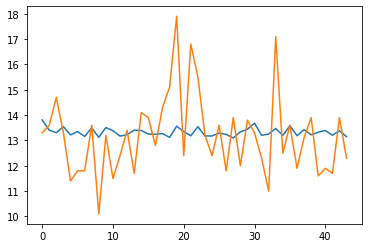

In [61]:
df = read_file("/content/drive/MyDrive/파이썬/data_revised.csv")
#df = normalization(df, 2)
df = data_IQR(df,2)
train_test_data = before_making_model(df,[df.columns[3],df.columns[4],df.columns[5], df.columns[6]],2)

Y_value = linearRegress(train_test_data, df.columns)
Y_test = Reset_index(Y_value[1],2)
plot_picture(Y_value[0],Y_test)

Y_value2 = Ridge_function(train_test_data)
Y_test = Reset_index(Y_value2[1],2)
plot_picture(Y_value2[0],Y_test)

Y_value3 = Lasso_function(train_test_data)
Y_test = Reset_index(Y_value3[1],2)
plot_picture(Y_value3[0],Y_test)

Y_value4 = Elastic_function(train_test_data)
Y_test = Reset_index(Y_value4[1],2)
plot_picture(Y_value4[0],Y_test)



accuracy: 0.360
RMSE: 1.528
----------- plot grow----------- 


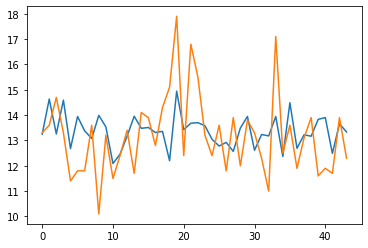

In [60]:
train_test_data = before_making_model2(df,[df.columns[3],df.columns[4],df.columns[5], df.columns[6]],2)

Y_value = knn_reg_function(train_test_data, df.columns)
Y_test = Reset_index(Y_value[1],2)
plot_picture(Y_value[0],Y_test)

In [ ]:
df